# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yarmouth
Processing Record 2 of Set 1 | tsiombe
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | tamanrasset
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | afonso claudio
Processing Record 7 of Set 1 | xining
Processing Record 8 of Set 1 | quatre cocos
Processing Record 9 of Set 1 | tuxpan
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mossel bay
Processing Record 12 of Set 1 | yorkton
Processing Record 13 of Set 1 | suva
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | el calafate
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | richards bay
Processing Record 23 of Set 1 |

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

current_date = datetime.now()
city_datetime = datetime.utcfromtimestamp(city_date)
formatted_date = city_datetime.strftime('%Y-%m-%d')
#print(formatted_date)

2024-12-05


C:\Users\patelb\AppData\Local\Temp\ipykernel_45948\1712656084.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  city_datetime = datetime.utcfromtimestamp(city_date)


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yarmouth,41.7057,-70.2286,5.56,90,100,8.05,US,1733424941
1,tsiombe,-25.3000,45.4833,24.84,88,0,2.31,MG,1733424942
2,hermanus,-34.4187,19.2345,18.22,73,100,7.91,ZA,1733424943
3,tamanrasset,22.7850,5.5228,15.95,13,0,2.06,DZ,1733424944
4,tiksi,71.6872,128.8694,-24.96,95,38,3.12,RU,1733424945


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
#function for scatter plots
def scatter_plot(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="lightblue", marker="h", edgecolor="black")
    plt.tight_layout()
    plt.grid()

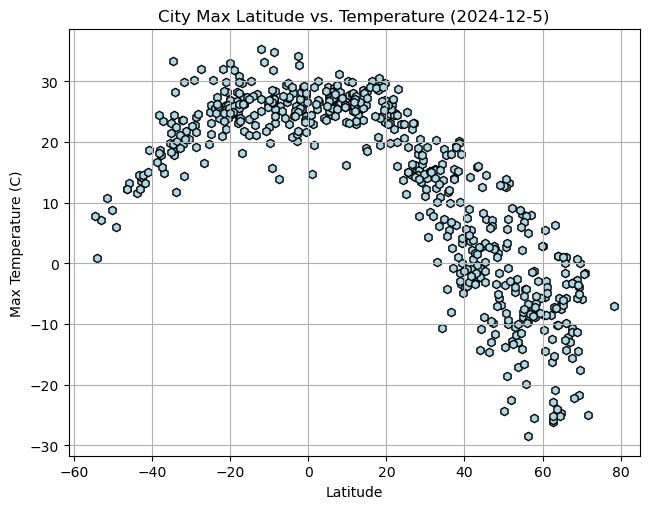

In [ ]:
# Build scatter plot for latitude vs. temperature
scatter_plot("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

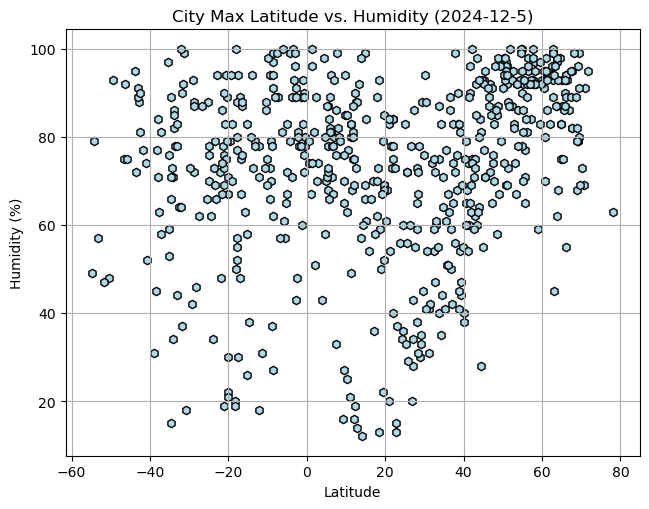

In [ ]:
# Build the scatter plots for latitude vs. humidity
scatter_plot("Lat", "Humidity")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

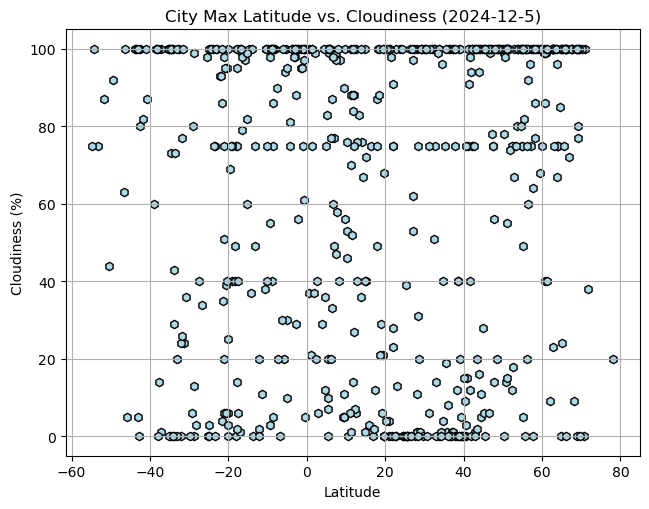

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
scatter_plot("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

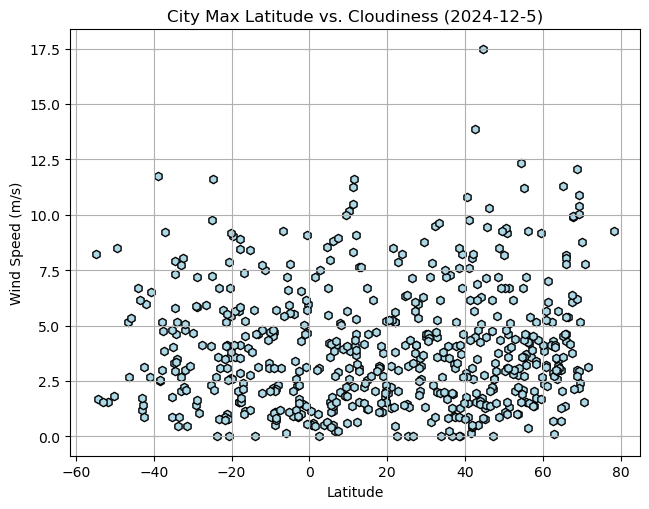

In [ ]:
# Build the scatter plots for latitude vs. wind speed
scatter_plot("Lat","Wind Speed")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r^2 Value is: {r_value**2:}")

    return slope, intercept

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yarmouth,41.7057,-70.2286,5.56,90,100,8.05,US,1733424941
3,tamanrasset,22.7850,5.5228,15.95,13,0,2.06,DZ,1733424944
4,tiksi,71.6872,128.8694,-24.96,95,38,3.12,RU,1733424945
6,xining,36.6167,101.7667,-8.11,89,100,1.28,CN,1733424947
8,tuxpan,19.5500,-103.4000,29.70,22,21,1.72,MX,1733424949


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tsiombe,-25.3000,45.4833,24.84,88,0,2.31,MG,1733424942
2,hermanus,-34.4187,19.2345,18.22,73,100,7.91,ZA,1733424943
5,afonso claudio,-20.0742,-41.1239,26.97,67,6,2.63,BR,1733424946
7,quatre cocos,-20.2078,57.7625,25.06,71,25,5.45,MU,1733424948
9,puerto ayora,-0.7393,-90.3518,24.19,90,61,3.13,EC,1733424950


###  Temperature vs. Latitude Linear Regression Plot

The r^2 Value is: 0.7692332206717222


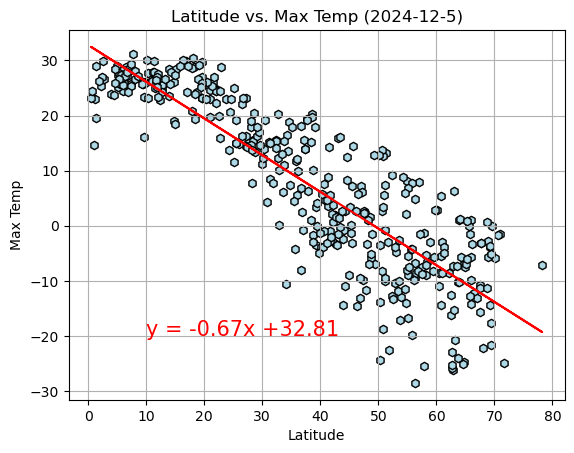

In [ ]:
# Linear regression on Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Max Temp ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.44552057500551523


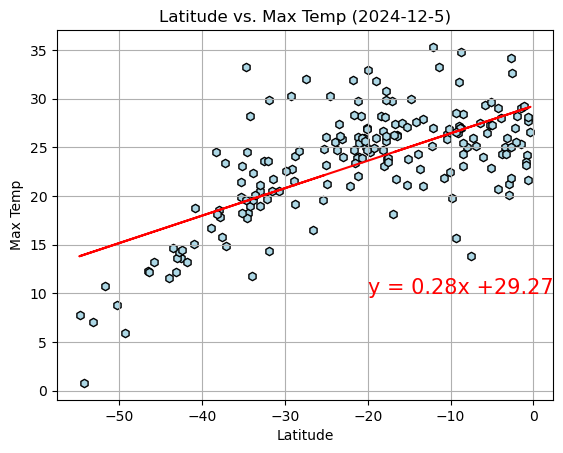

In [ ]:
# Linear regression on Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Max Temp ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

The result from the data showed that there is a strong negative correlation between latitude and max temperature for northern hemisphere. Whereas, there is a moderate positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 Value is: 0.1386535417349466


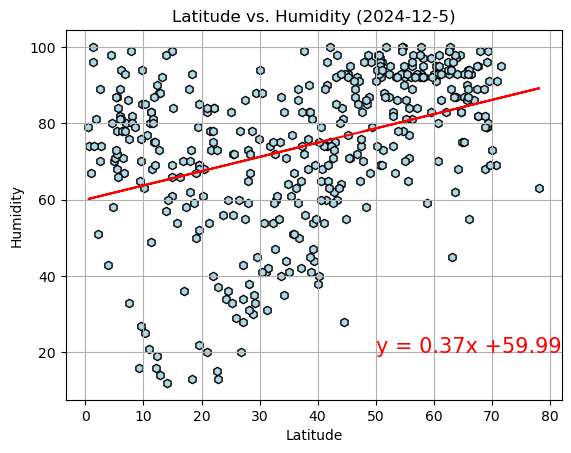

In [ ]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.01584416007895897


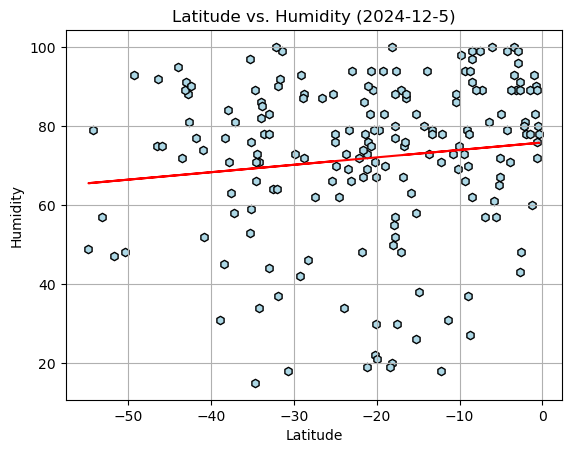

In [ ]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and humidity based on the data available. 
The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. 
The scatter points exhibit that the data is too spread for there to be any reliable correlation between latitude and humidity.
Both the Northern and Souther Hemispheres exhibit a weak correlations between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 Value is: 0.05401141562217207


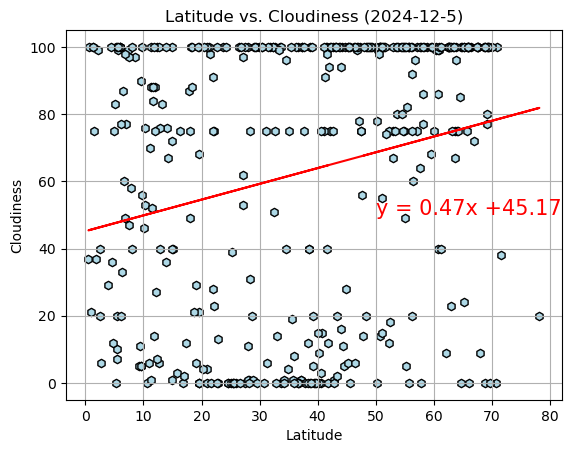

In [ ]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.013844961562242937


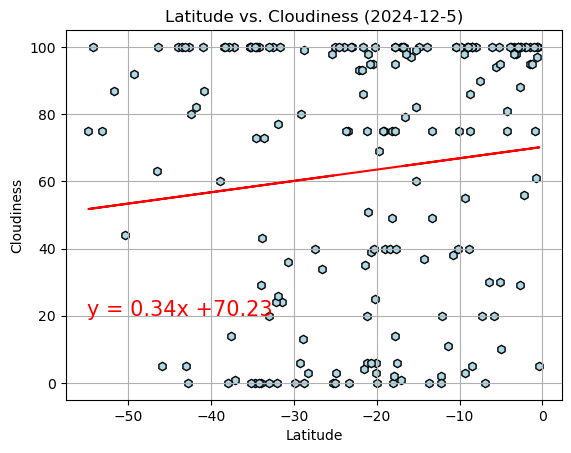

In [ ]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** 

The result from the data showed that there is a very week, almost none negative correlation between Cloudiness and Latitude in the Southern Hemisphere cities.Whereas there is a a weak positive correlation between latitude and cloudiness for Northern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 Value is: 0.01909224716027829


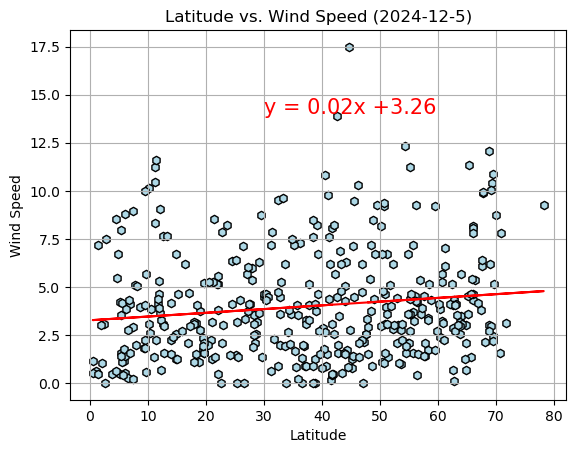

In [ ]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Wind Speed ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,14),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.007189369401491303


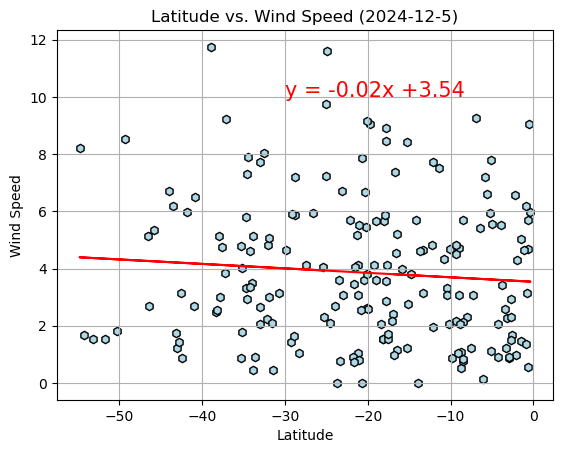

In [ ]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Wind Speed ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

The Northern Hemisphere plot is a linear regression model between Wind Speed and latitude. 
The result from the data showed that there is a very week, positive correlation between Wind Speed and Latitude in the Northern Hemisphere cities.
And there is a very week, negative correlation between Wind Speed and Latitude in the Southern Hemisphere cities.

